In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Data taken from ETH and BITQ from 12 05 2021 to 04 03 2022
eth_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_ETHUSDT_d.csv')
bitq_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\BITQ.csv')


#Quick check
#eth_data.head()
bitq_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04 03 2022,15.73,15.782400,14.656000,14.779,14.779,111332
1,03 03 2022,17.17,17.219999,15.920000,16.000,16.000,91300
2,02 03 2022,16.83,17.139999,16.549999,17.000,17.000,206600
3,01 03 2022,17.15,17.389999,16.462999,16.770,16.770,144400
4,28 02 2022,15.36,16.860001,15.360000,16.600,16.600,130700


In [16]:
#Collecting dates and closing prices from the data
db_eth = eth_data.iloc[:,[1,6]]
db_bitq = bitq_data.iloc[:,[0,5]]

#Merging crypto data on the date
ETHxBITQ = pd.merge(db_eth, db_bitq,on='Date', how='inner')
ETHxBITQ

#Renaming the columns
cols = {'close':'ETH','Adj Close':'BITQ'}
ExB = ETHxBITQ.rename(columns =cols, inplace= False)
#ExB

#Setting the index as the date
ExB.set_index('Date',inplace=True, drop=True)
ExB

,ETH,BITQ
Date,,
04 03 2022,2622.10,14.779000
03 03 2022,2833.99,16.000000
02 03 2022,2947.30,17.000000
01 03 2022,2976.33,16.770000
28 02 2022,2920.95,16.600000
...,...,...
18 05 2021,3375.07,21.661709
17 05 2021,3282.51,21.768702
14 05 2021,4075.01,22.683027


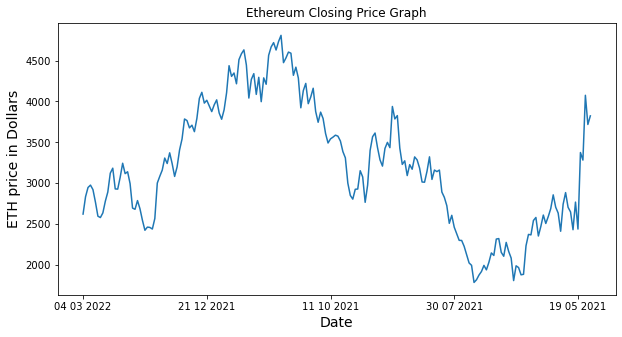

In [9]:
ExB['ETH'].plot(figsize=(10,5))
plt.title('Ethereum Closing Price Graph')
plt.xlabel('Date',fontsize=14)
plt.ylabel('ETH price in Dollars',fontsize=14)
plt.savefig('Ethereum Closing Price Graph.jpeg', bbox_inches='tight')

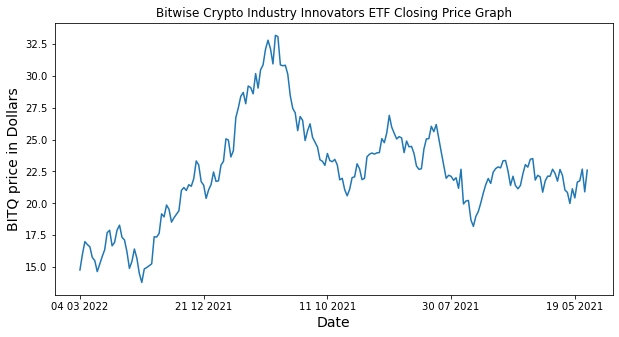

In [10]:
ExB['BITQ'].plot(figsize=(10,5))
plt.title('Bitwise Crypto Industry Innovators ETF Closing Price Graph')
plt.xlabel('Date',fontsize=14)
plt.ylabel('BITQ price in Dollars',fontsize=14)
plt.savefig('Bitwise Crypto Industry Innovators ETF Closing Price Graph.jpeg', bbox_inches='tight')

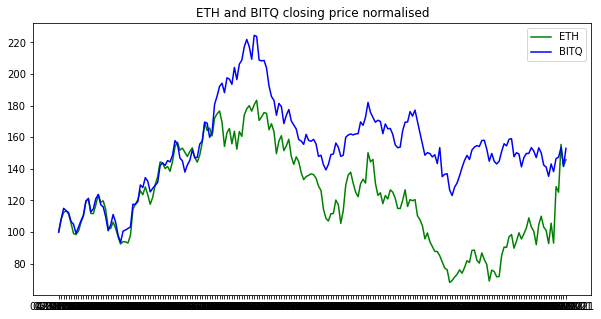

In [11]:
#Normalised data (Normalising the two graphs to see if the closing prices tracked eachother over time)
x1 = ExB['ETH']/ExB['ETH'].iloc[0]*100
x2 = ExB['BITQ']/ExB['BITQ'].iloc[0]*100

plt.figure(figsize=(10,5))
plt.plot(x1,c='green',label='ETH')
plt.plot(x2,c='blue',label='BITQ')
plt.title('ETH and BITQ closing price normalised')
plt.style.use('tableau-colorblind10')
plt.savefig('ETH and BITQ closing price normalised Graph.jpeg', bbox_inches='tight')
plt.legend()

plt.show()

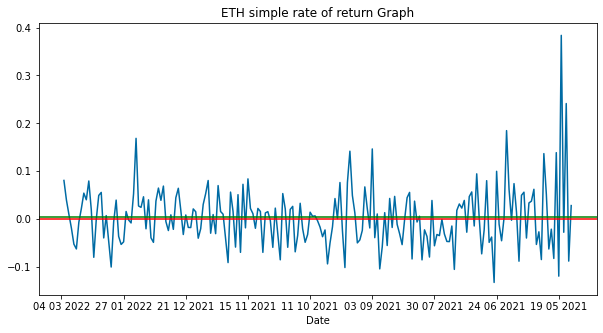

In [18]:
#Simple rate of return
ExB['Simple return ETH'] = (ExB['ETH']/ExB['ETH'].shift(1)) - 1
ExB['Simple return ETH'].plot(figsize=(10,5))

plt.title('ETH simple rate of return Graph')

#Plot the Zero line
plt.axhline(y=0, color='r', linestyle='-')

#Plot the average
plt.axhline(y=ExB['Simple return ETH'].mean(), color='g', linestyle='-')

plt.savefig('ETH simple rate of return Graph.jpeg', bbox_inches='tight')

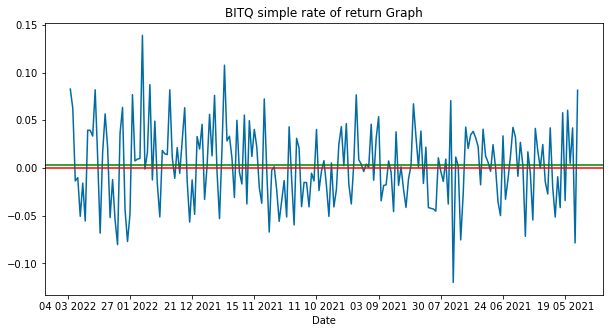

In [19]:
#Simple rate of return
ExB['Simple return BITQ'] = (ExB['BITQ']/ExB['BITQ'].shift(1)) - 1
ExB['Simple return BITQ'].plot(figsize=(10,5))

plt.title('BITQ simple rate of return Graph')

#Plot the Zero line
plt.axhline(y=0, color='r', linestyle='-')

#Plot the average
plt.axhline(y=ExB['Simple return BITQ'].mean(), color='g', linestyle='-')
plt.savefig('BITQ simple rate of return Graph.jpeg', bbox_inches='tight')

In [20]:
#The average daily rate of return in a percentage
print('ETH average daily returns = ' + str(round(ExB['Simple return ETH'].mean(),5)*100) + '%')

#The average rate of return in this period in a percentage (Assuming there were 205 trading days in this period)
print('ETH average returns for period = ' + str(round(ExB['Simple return ETH'].mean()*205,5)*100) + '%' + '\n')

#The average daily rate of return in a percentage
print('BITQ average daily returns = ' + str(round(ExB['Simple return BITQ'].mean(),5)*100) + '%')

#The average rate of return in this period in a percentage (Assuming there were 205 trading days in this period)
print('BITQ average returns for period = ' + str(round(ExB['Simple return BITQ'].mean()*205,5)*100) + '%')

ETH average daily returns = 0.371%
ETH average returns for period = 76.092%

BITQ average daily returns = 0.28800000000000003%
BITQ average returns for period = 59.031%


<function matplotlib.pyplot.show(close=None, block=None)>

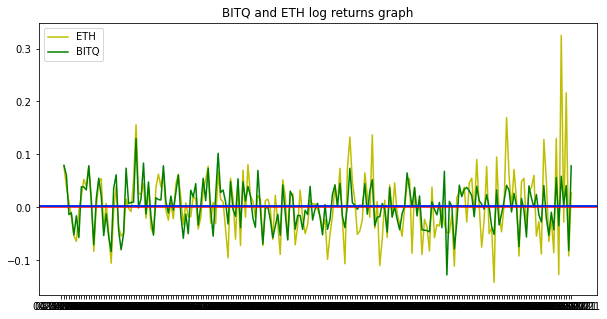

In [21]:
# Logarithmetic rate of return
ExB['Simple log return ETH'] = np.log(ExB['ETH']/ExB['ETH'].shift(1))
ExB['Simple log return BITQ'] = np.log(ExB['BITQ']/ExB['BITQ'].shift(1))

plt.figure(figsize=(10,5))
plt.plot(ExB['Simple log return ETH'],'-y',label='ETH')
plt.plot(ExB['Simple log return BITQ'],'-g',label='BITQ')
plt.title('BITQ and ETH log returns graph')

#Plot the zero line
plt.axhline(y=0, color='r', linestyle='-')

#Plot the averages
plt.axhline(y=ExB['Simple log return ETH'].mean(), color='c', linestyle='-')
plt.axhline(y=ExB['Simple log return BITQ'].mean(), color='b', linestyle='-')

plt.savefig('BITQ and ETH log returns graph.jpeg', bbox_inches='tight')

plt.legend()
plt.show

In [22]:
#The average daily rate of return in a percentage
print('ETH average daily log returns = ' + str(round(ExB['Simple log return ETH'].mean(),4)*100) + '%')

#The average rate of return in this period in a percentage (Assuming there were 205 trading days in this period)
print('ETH average log returns for period = ' + str(round(ExB['Simple log return ETH'].mean()*250,5)*100) + '%' + '\n')

#The average daily rate of return in a percentage
print('BITQ average daily log returns = ' + str(round(ExB['Simple log return BITQ'].mean(),5)*100) + '%')

#The average rate of return in this period in a percentage (Assuming there were 205 trading days in this period)
print('BITQ average log returns for period = ' + str(round(ExB['Simple log return BITQ'].mean()*250,5)*100) + '%')

ETH average daily log returns = 0.18%
ETH average log returns for period = 45.989999999999995%

BITQ average daily log returns = 0.207%
BITQ average log returns for period = 51.82600000000001%


In [23]:
ETH_variance = ExB['ETH'].var()
ETH_variance

583343.8814322426

In [24]:
#To look for the covariance
ExB = ExB.drop(['Simple return ETH','Simple return BITQ','Simple log return ETH','Simple log return BITQ'],axis=1)

log_returns = np.log(ExB/ExB.shift(1))

In [25]:
#Calculating the standard deviation
log_returns['ETH'].std()

0.06059211785407074

In [26]:
#Calculating the standard deviation
log_returns['BITQ'].std()

0.04015029124324896

In [27]:
# Calculating the daily variance and covariance
cov = ExB.cov()
cov

,ETH,BITQ
ETH,583343.881432,1982.120465
BITQ,1982.120465,16.231251


In [28]:
# Calculating the annualised variance and covariance
cov = ExB.cov() *250
cov

,ETH,BITQ
ETH,1.458360e+08,495530.116277
BITQ,4.955301e+05,4057.812691


In [31]:
#Calculating corralation
ExB.corr()

,ETH,BITQ
ETH,1.000000,0.644157
BITQ,0.644157,1.000000


In [30]:
# Calculating the securities Beta
# The riskier the stock the higher the Beta
cov_with_market = cov.iloc[0,1]

eth_market_var = ExB['ETH'].var()

ETH_beta = cov_with_market / eth_market_var
ETH_beta



0.8494648389215079